# HR Analysis Case Study

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Problem statement
Attrition is a categorical data so while prdicting attrition we will use classification algorithms.

In [1]:
#Loading the necessary libraries and data set
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Loading dataset
attrition_df = pd.read_csv("hr_attrition.csv")
attrition_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## EDA(Exploratory Data Analysis)

In [2]:
attrition_df.shape

(1470, 35)

In [3]:
attrition_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observation:
    1. We do not have null values in the dataframe.

In [4]:
attrition_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We have 2 types of data in the dataset ie. object and int64 

In [5]:
attrition_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
attrition_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observation:
    1. Employee count has only 1 count for each row so we can ignore it.
    2. columns like TotalWorkingyears, yearsAtCompany, YearInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager have definitely have some outliers.

In [8]:
columns = attrition_df.columns

In [9]:
for i in columns:
    print(f"The value counts in the column {i} is {attrition_df[i].value_counts()}\n")
    print("*"*100)

The value counts in the column Age is 35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

****************************************************************************************************
The value counts in the column Attrition is No     1233
Yes     237
Name: Attrition, dtype: int64

****************************************************************************************************
The value counts in the column BusinessTravel is Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

**************************************************************************************

Columns Employeecount, over 18, StandardHours has only 1 value so we can drop them.

In [10]:
#dropping the single valued columns
attrition_df.drop('EmployeeCount',axis=1,inplace=True)
attrition_df.drop('StandardHours',axis=1,inplace=True)
attrition_df.drop('Over18',axis=1,inplace=True)

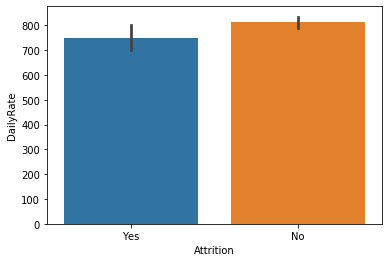

In [11]:
sns.barplot(x=attrition_df['Attrition'],y='DailyRate',data=attrition_df)

Daily Rate does not have significant difference

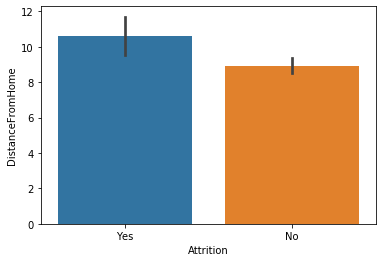

In [12]:
sns.barplot(x=attrition_df['Attrition'],y='DistanceFromHome',data=attrition_df)

The more the distance of office the more chances of the employee is to leave the organisation

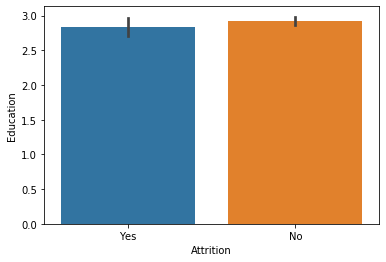

In [13]:
sns.barplot(x=attrition_df['Attrition'],y='Education',data=attrition_df)

Education is not telling much whether the employee stays or leaves

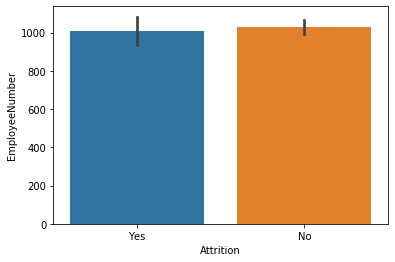

In [14]:
sns.barplot(x=attrition_df['Attrition'],y='EmployeeNumber',data=attrition_df)

There are equal number of employees who left and stayed in the company

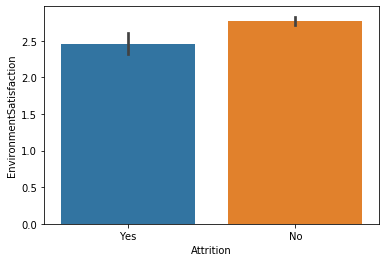

In [15]:
sns.barplot(x=attrition_df['Attrition'],y='EnvironmentSatisfaction',data=attrition_df)

higher employee satisfaction might lead to better results and emloyees not leaving the company

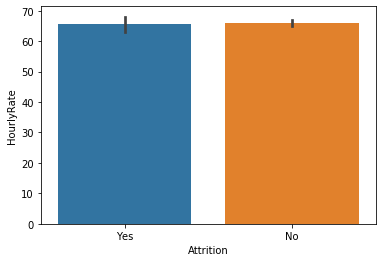

In [16]:
sns.barplot(x=attrition_df['Attrition'],y='HourlyRate',data=attrition_df)

No much significant difference concluding

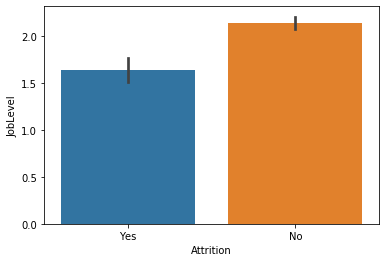

In [17]:
sns.barplot(x=attrition_df['Attrition'],y='JobLevel',data=attrition_df)

Higher job level people do not tend to quit

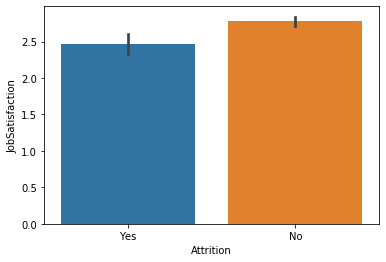

In [18]:
sns.barplot(x=attrition_df['Attrition'],y='JobSatisfaction',data=attrition_df)

Higher job satisfaction people do not tend to leave the organisation

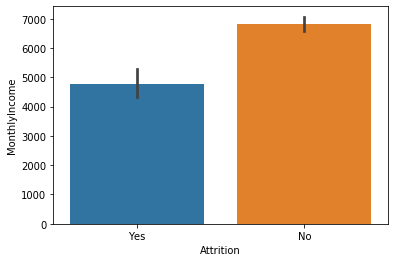

In [19]:
sns.barplot(x=attrition_df['Attrition'],y='MonthlyIncome',data=attrition_df)

Higher Monthly salaried employeed do not tend to leave the organisation

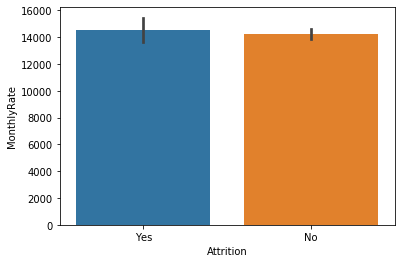

In [20]:
sns.barplot(x=attrition_df['Attrition'],y='MonthlyRate',data=attrition_df)

No significant difference found

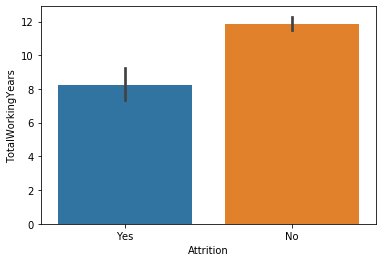

In [21]:
sns.barplot(x=attrition_df['Attrition'],y='TotalWorkingYears',data=attrition_df)

If working hours is greater than 8, employees tend to not leave their job for quite surely.

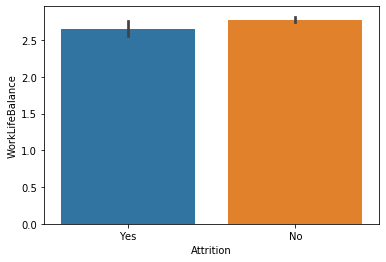

In [22]:
sns.barplot(x=attrition_df['Attrition'],y='WorkLifeBalance',data=attrition_df)

No significant difference found

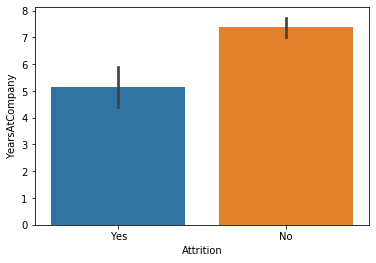

In [23]:
sns.barplot(x=attrition_df['Attrition'],y='YearsAtCompany',data=attrition_df)

If years at company is more than 5 then people do not tend to leave

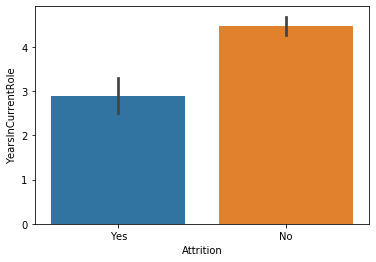

In [24]:
sns.barplot(x=attrition_df['Attrition'],y='YearsInCurrentRole',data=attrition_df)

If more than 4 years a person is working in the current role then the person do not leave the company

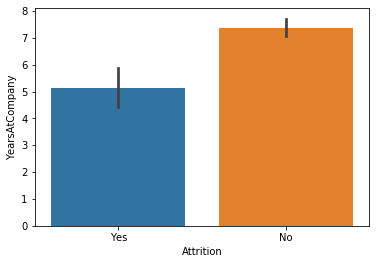

In [25]:
sns.barplot(x=attrition_df['Attrition'],y='YearsAtCompany',data=attrition_df)

More number of years in the company do not make people quit the job

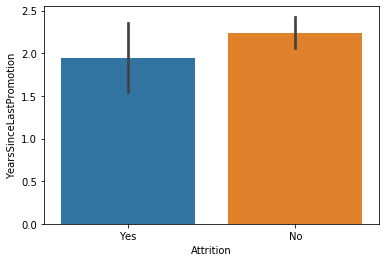

In [26]:
sns.barplot(x=attrition_df['Attrition'],y='YearsSinceLastPromotion',data=attrition_df)

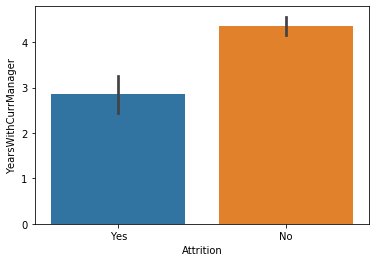

In [27]:

sns.barplot(x=attrition_df['Attrition'],y='YearsWithCurrManager',data=attrition_df)

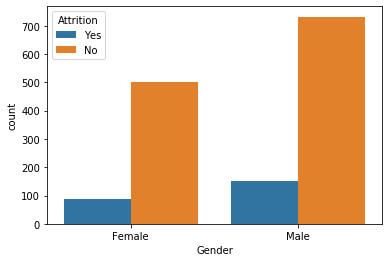

In [28]:
sns.countplot(x='Gender',hue='Attrition',data=attrition_df)

Attrition rate is lower in case of both male and female, can't get enough information out of it.

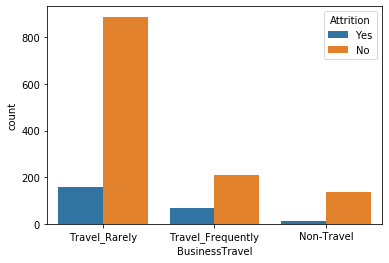

In [29]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=attrition_df)

Most of the people who travel rarely, attrition rate is far lesser than in comparison to other Travel frequently and Non-Travel.

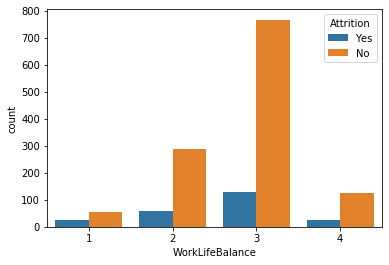

In [30]:
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=attrition_df)

Not easy to interpret from this as ratio wise attrition rate is almost same for all scores of worklife balance.

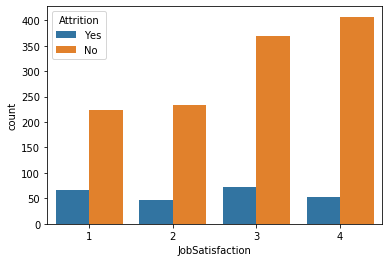

In [31]:
sns.countplot(x='JobSatisfaction',hue='Attrition',data=attrition_df)

Employee who is satisfied with the job, tend to not leave the company compare to others. 

Though people not leaving company is still higher in all sub cases.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

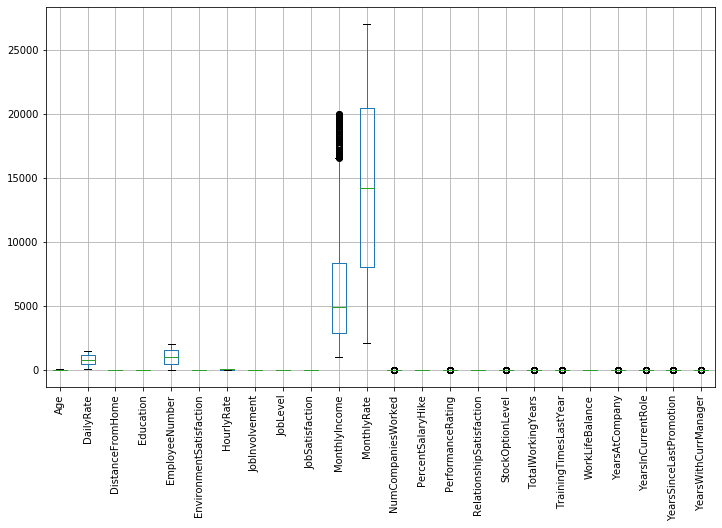

In [32]:
g= attrition_df.boxplot(figsize=(12,7))
plt.setp(g.get_xticklabels(), rotation=90)

# Outlier Analysis

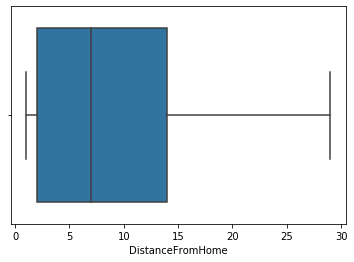

In [33]:
sns.boxplot(attrition_df['DistanceFromHome'])

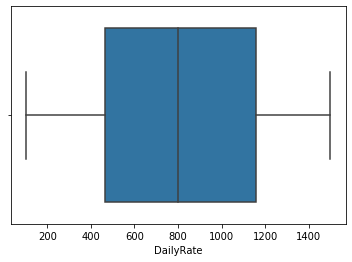

In [34]:
sns.boxplot(attrition_df['DailyRate'])

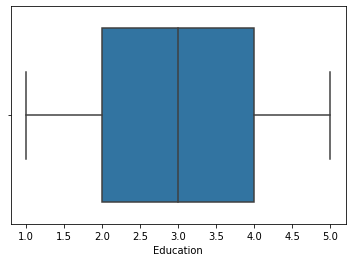

In [35]:
sns.boxplot(attrition_df['Education'])

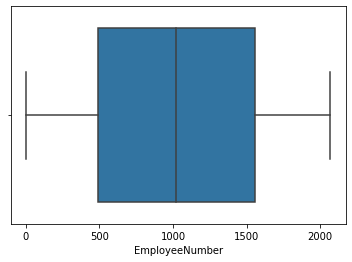

In [36]:
sns.boxplot(attrition_df['EmployeeNumber'])

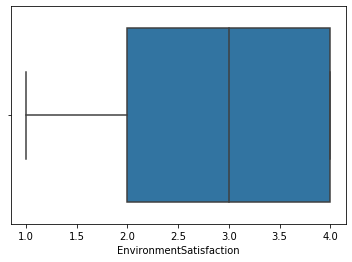

In [37]:
sns.boxplot(attrition_df['EnvironmentSatisfaction'])

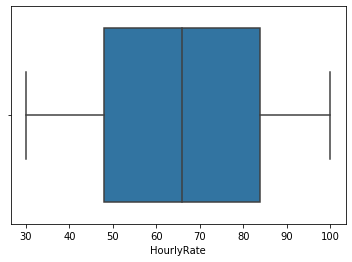

In [38]:
sns.boxplot(attrition_df['HourlyRate'])

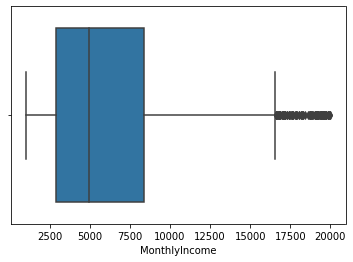

In [39]:
sns.boxplot(attrition_df['MonthlyIncome'])

These cannot be considered as outliers as different people may have higher salaries

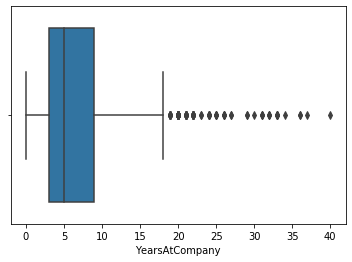

In [40]:
sns.boxplot(attrition_df['YearsAtCompany'])

Removing outliers might not be of great help, as unseen data might contain yearsatcompany greater than 20.

most of these outliers tend to leave the company.

Let's plot distribution plot and get idea

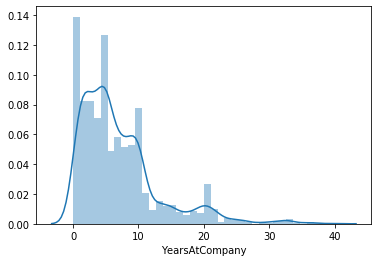

In [41]:
sns.distplot(attrition_df['YearsAtCompany'])

In [42]:
attrition_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [43]:
# Conversion of categorical to numerical
from sklearn.preprocessing import LabelEncoder
col2Encode=['Attrition','OverTime','MaritalStatus','JobRole','Gender','EducationField','Department','BusinessTravel']
for col in col2Encode:
    attrition_df[col]=LabelEncoder().fit_transform(attrition_df[col])

In [44]:
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


Here attribution 1 species yes and 0 specifies no

## Correlation Matrix

(32.0, 0.0)

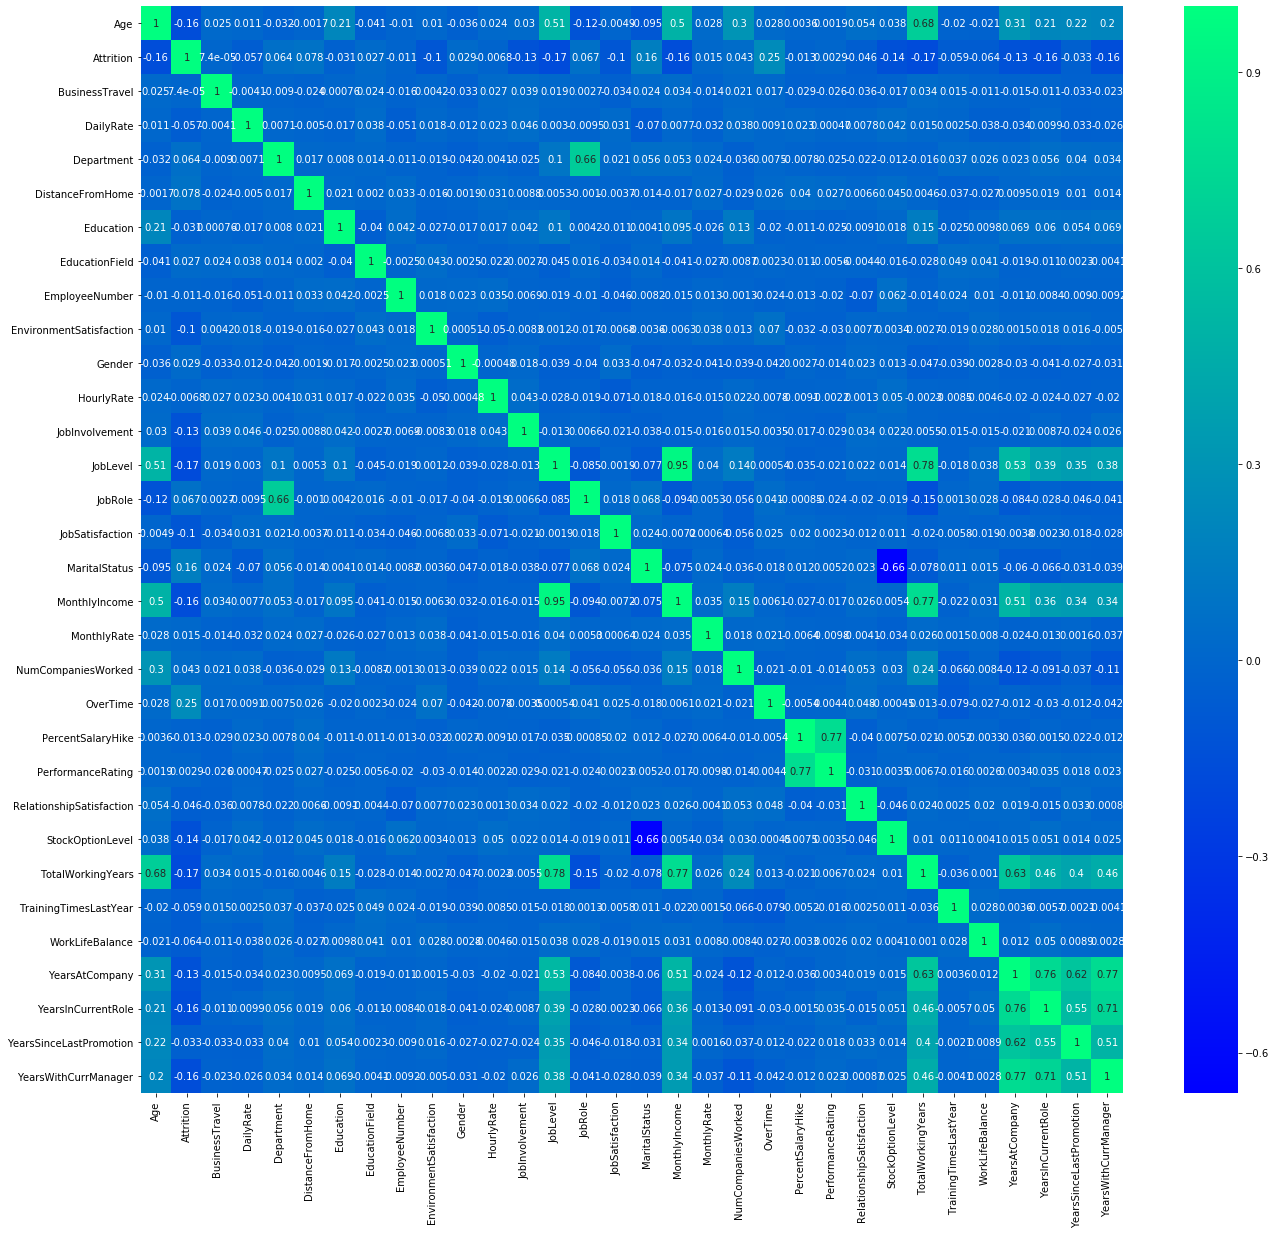

In [45]:
plt.figure(figsize=(22,20))
ax=sns.heatmap(attrition_df.corr(), annot=True, cmap='winter')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Let's remove highly correlated variables.

Age is highly correlated with MonthlyIncome and TotalWorkingYears.

Job Role and department are correlated.

Job Level is highly correlated with Total Wroking Years and MonthlyIncome.

Attrition attribute is very less correlated to EmployeeNumber, WorkLifeBalance, Gender, Education, EducationField

In [46]:
attrition_df_copy=attrition_df.copy()
cols2drop=['Department','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager','JobLevel','Gender','Education','EducationField','EmployeeNumber','WorkLifeBalance']

for col in cols2drop:
    attrition_df.drop(col,axis=1,inplace=True)

In [47]:
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,1102,1,2,94,3,7,4,...,19479,8,1,11,3,1,0,0,6,0
1,49,0,1,279,8,3,61,2,6,2,...,24907,1,0,23,4,4,1,3,10,1
2,37,1,2,1373,2,4,92,2,2,3,...,2396,6,1,15,3,2,0,3,0,0
3,33,0,1,1392,3,4,56,3,6,3,...,23159,1,1,11,3,3,0,3,8,3
4,27,0,2,591,2,1,40,3,2,2,...,16632,9,0,12,3,4,1,3,2,2


In [48]:
attrition_df.shape

(1470, 22)

# Model Selection:

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [50]:
Y=attrition_df['Attrition']
X=attrition_df.drop('Attrition',axis=1)

In [59]:
best_rstate=0
score=0
# mod: classification model
algo_list= [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier(), RandomForestClassifier()]
for algo in algo_list:
    for iActive_rs in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=iActive_rs)
        mod=algo
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        tempscore=accuracy_score(y_test,y_pred)
        if tempscore>score:
            score=tempscore
            best_rstate=iActive_rs
    print(f"Best accuracy Score {score*100} found with {algo} at random state {best_rstate} \n")

Best accuracy Score 88.58695652173914 found with LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) at random state 55 

Best accuracy Score 88.58695652173914 found with DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') at random state 55 

Best accuracy Score 88.58695652173914 found with MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) at random state 55 

B

Gradient boosting, Random forest and adaboost have the highest accuracy so we can finalise anyone in the model building.

# Finalising Gradient Boosting

In [60]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=66,test_size=0.2)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score is {}".format(accuracy_score(pred,y_test)))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

Accuracy score is 0.8945578231292517
[[246  29]
 [  2  17]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       275
           1       0.37      0.89      0.52        19

    accuracy                           0.89       294
   macro avg       0.68      0.89      0.73       294
weighted avg       0.95      0.89      0.91       294



In [61]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))

std: 0.0
cross_val_score: 86.60600907029479


Implies, we are not over/under fitting the model.

In [62]:
# ROC_curve
y_predProb=gbc.predict_proba(x_test)[:,1]

In [63]:
fpr,tpr,threshold=roc_curve(y_test,y_predProb)

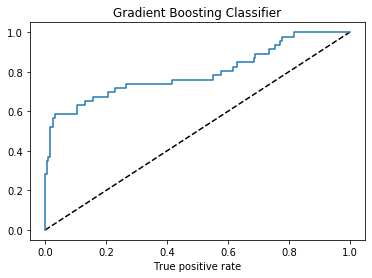

In [64]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gradient Boosting Classifier")
plt.xlabel('False Positive rate')
plt.xlabel('True positive rate')
plt.title("Gradient Boosting Classifier")
plt.show()

In [65]:
auc_score=roc_auc_score(y_test,gbc.predict(x_test))
print(auc_score)

0.680750350631136


In [66]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(gbc,'gbc_AttributionHR.pkl')

['gbc_AttributionHR.pkl']